Python-Protokoll: Versuch 245 Tobias Abele und Thimo Preis
    =====================

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Teil 1
----

Steigung c= 0.0587808722657 +- 0.000407373738348
B_ex 0.00352403310946 +- 2.44228859921e-05
B_theo 0.00302358158792 +- 7.5589539698e-05
Abweichung: -6.29997069332
chi2: 0.196711074105


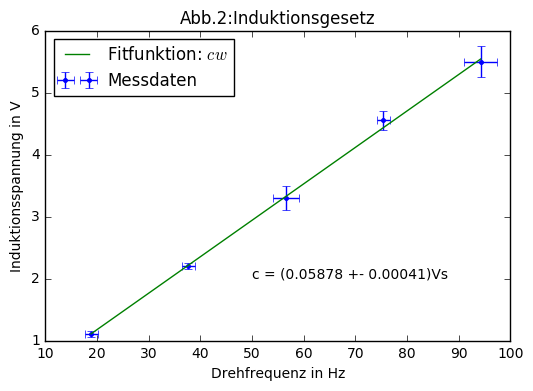

In [2]:
#Aufgabe 1: Induktionsgesetz
#Hier Induktionsspannung als Funktion der Drehfrequenz
#data
w  = np.array([3, 6, 9, 12, 15])*2*np.pi #Herz
dw = np.array([0.2, 0.2, 0.4, 0.2, 0.5])*2*np.pi

U  = np.array([2.2, 4.4, 6.6, 9.1, 11])/2#Induktionsspannung Vpp, dh. durch 2 geteilt
dU = np.array([0.1, 0.1, 0.4, 0.3, 0.5])/2

I  = 4
dI = 0.1
n1 = 124 #Windungen der Helmholtzspulen
n2 = 4000 #Windungen der Flachspule
mu0= 1.2566*10**(-6)
r  = 0.1475#Radius der Helmholtzspulen
A  = 41.7/100**2 #Fläche der Flachspule

#Fit
def fit(w, c):
    return c*w
popt, pcov = curve_fit(fit, w, U, p0 = [1], sigma = dU)
c = popt[0]
dc = np.sqrt(pcov[0][0])

#Plot
plt.xlabel('Drehfrequenz in Hz')
plt.ylabel('Induktionsspannung in V')
plt.title('Abb.2:Induktionsgesetz')
plt.errorbar(w, U, xerr = dw, yerr = dU, fmt = '.', label='Messdaten')
plt.plot(w, fit(w, *popt), label = 'Fitfunktion: $cw$')
plt.legend(loc = 'best')
label =  'c = ({value1:.4} +- {value2:.2})Vs'.format(value1 = c, value2 = dc)
plt.text(50, 2, label)
plt.savefig('figures/Induktionsgesetz1.pdf', format = 'pdf', bbox_inches = 'tight')

#Berechnungen
B_theo  = mu0*8*I*n1/(np.sqrt(125)*r)
dB_theo = B_theo*dI/I
B_ex = c/(A*n2)
dB_ex= B_ex*dc/c

#Print
print('Steigung c=', c, '+-', dc)
print('B_ex', B_ex, '+-', dB_ex)
print('B_theo', B_theo, '+-', dB_theo)
print('Abweichung:', (B_theo-B_ex)/np.sqrt(dB_theo**2+dB_ex**2))


print('chi2:',np.sum(((fit(w, *popt) - U)**2/dU**2))/(len(w)-1))

Steigung c= 0.573106208338 +- 0.00423345357806
chi2: 0.388613503356


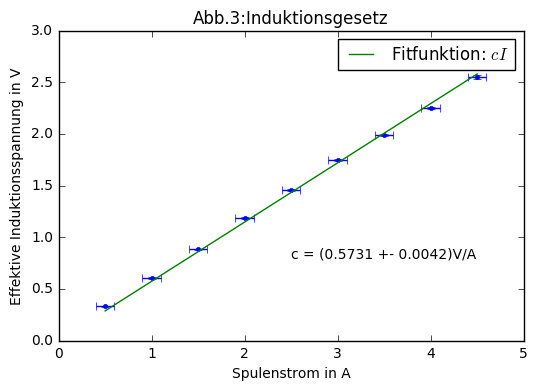

In [3]:
#data
#Hier Induktionsspannung als Funktion des Spulenstroms bei konstanter Winkelgeschwindigkeit
I = np.arange(0.5, 5.0, 0.5)
dI= 0.1

U = np.array([0.333, 0.605, 0.883, 1.19, 1.46, 1.75, 1.99, 2.25, 2.55])#Dies in Vrms
dU= np.array([0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02])

#Fit
def fit(U, c):
    return U/c
popt, pcov = curve_fit(fit, U, I, p0 = [1], sigma = dI)
c = popt[0]
dc = np.sqrt(pcov[0][0])


#Plot
plt.xlabel('Spulenstrom in A')
plt.ylabel('Effektive Induktionsspannung in V')
plt.title('Abb.3:Induktionsgesetz')
plt.errorbar(I, U, xerr = dI, yerr = dU, fmt = '.')
plt.plot(I, c*I, label = 'Fitfunktion: $cI$')
plt.legend(loc = 'best')
label =  'c = ({value1:.4} +- {value2:.2})V/A'.format(value1 = c, value2 = dc)
plt.text(2.5, 0.8, label)
plt.savefig('figures/Induktionsgesetz2.pdf', format = 'pdf', bbox_inches = 'tight')

#Print
print('Steigung c=', c, '+-', dc)

print('chi2:',np.sum(((U/c - I)**2/dI**2))/(len(I)-1))

Teil 2
----

2.4710340034 0.0265886035381 -4.10328094261 0.648911016738
chi2: 0.6901222243


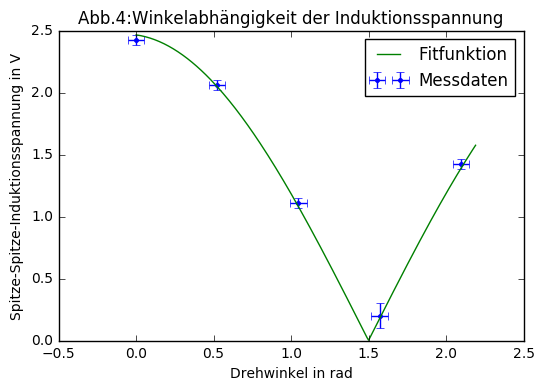

In [4]:
#Induktionsspannung als Funktion des Spulendrehwinkel
th = np.array([0, 30, 60, 90, 120])*np.pi/180 #Spulendrehwinkel in rad
dth= 3*np.pi/180

U = np.array([2.42, 2.06, 1.11, 0.2, 1.42])#Induktionsspannung in Vpp
dU= np.array([0.04, 0.04, 0.04, 0.1, 0.04])

#Fit
def fit(th, U0, b):
    return U0*np.absolute(np.cos(th-b))
popt, pcov = curve_fit(fit, th, U, p0 = [2.3,0], sigma = dU)
U0  = popt[0]
dU0 = np.sqrt(pcov[0][0])
b  = popt[1]
db = np.sqrt(pcov[1][1])

x=np.arange(0,2.2, 0.01)


plt.xlabel('Drehwinkel in rad')
plt.ylabel('Spitze-Spitze-Induktionsspannung in V')
plt.title('Abb.4:Winkelabhängigkeit der Induktionsspannung')
plt.errorbar(th, U, yerr = dU, xerr = dth, fmt = '.', label= 'Messdaten')
plt.plot(x, fit(x, *popt), label = 'Fitfunktion')
plt.legend(loc = 'best')

print(U0, dU0, b*180/np.pi, db*180/np.pi)
print('chi2:',np.sum(((fit(th, *popt) - U)**2/dU**2))/(len(th)-1))
plt.savefig('figures/Winkelabhängigkeit.pdf', format = 'pdf', bbox_inches = 'tight')

In [5]:
#Hier Induktionsspannung als Funktion der Frequenz
w = 2*np.pi*np.array([19.9, 39.4, 59.5, 80, 100, 120, 140, 160, 180, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1790, 2020])
dw= 2*np.pi*np.array([0.2, 0.4, 0.4, 0.4, 1, 2, 2, 2, 2, 2, 2, 5, 5, 10, 20, 20, 20, 20, 20])

I = np.array([450, 505, 351, 265, 212, 170, 150, 129, 114, 101, 93, 58, 40, 29, 21, 16, 11, 6, 3])/1000
dI= np.array([1, 1, 1, 1, 1, 10, 10, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])/1000

Ua = np.array([2.14, 4.92, 5.12, 5.24, 5.24, 5.28, 5.24, 5.32, 5.32, 5.32, 9.92, 9.9, 9.9, 9.9, 9.9, 9.9, 10, 10.1, 10.2])
dUa= np.array([0.02, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ])

Ue = np.array([5, 8.2, 8.1, 7.9, 7.8, 7.76, 7.7, 7.68, 7.68, 7.68, 14.4, 14.2, 14.2, 14.2, 14.2, 14.2, 14.2, 14.2, 14.2, ])
dUe= np.array([0.2, 0.2, 0.2, 0.2, 0.2, 0.04, 0.1, 0.04,0.04, 0.04, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, ])
Ueff = Ue/np.sqrt(8)
dUeff = Ueff*dUe/Ue

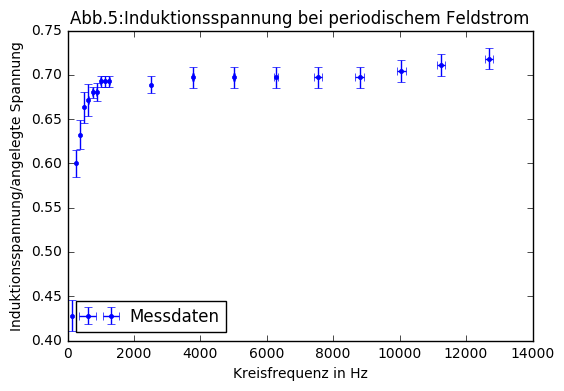

In [6]:
plt.errorbar(w, Ua/Ue, xerr = dw, yerr = Ua/Ue*np.sqrt((dUa/Ua)**2+(dUe/Ue)**2), fmt = '.', label='Messdaten')
plt.xlabel('Kreisfrequenz in Hz')
plt.ylabel('Induktionsspannung/angelegte Spannung')
plt.title('Abb.5:Induktionsspannung bei periodischem Feldstrom')
plt.legend(loc = 'best')
plt.savefig('figures/Uein_Uaus.pdf', format = 'pdf', bbox_inches = 'tight')

L_theo: 0.02057135517612647


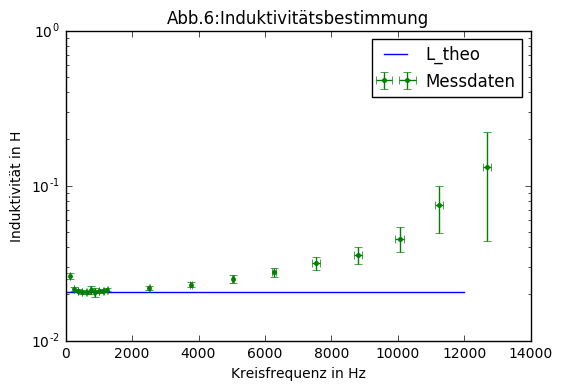

In [7]:
R  = 2.2
N  = 124
mu0= 1.2566*10**(-6)
r  = 0.1475
l  = 0.01

L=2*N**2*r*mu0*(np.pi*r/(l+2*r/2.2)+4.941/(4*np.pi)) #Formel Wikipedia für Helmholtzspule

print('L_theo:',L)
plt.yscale('log')
#plt.xscale('log')

#plt.ylim((0.015,0.03))
#plt.xlim((0,200))

L_ex=np.sqrt(((Ueff/I)**2-R**2)/(w)**2)

x=np.array([0,12000])
plt.plot(x, np.array([L,L]), label = 'L_theo')

plt.errorbar(w, L_ex, xerr = dw, yerr = L_ex*np.sqrt((dUeff/Ueff)**2+(dI/I)**2+(dw/w)**2), fmt = '.', label='Messdaten')

plt.xlabel('Kreisfrequenz in Hz')
plt.ylabel('Induktivität in H')
plt.title('Abb.6:Induktivitätsbestimmung')
plt.legend(loc = 'best')
plt.savefig('figures/Induktivität_1.pdf', format = 'pdf', bbox_inches = 'tight')

Mittelwert von L= 0.0213845670559 , Standardfehler= 0.000365640785225
Mittelwert von L= 0.0209275928795 , Standardfehler= 0.000116169180501


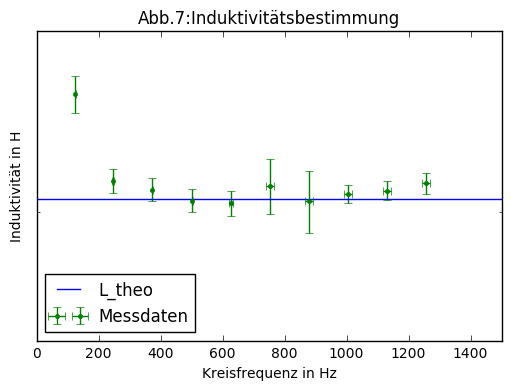

In [8]:
plt.yscale('log')
#plt.xscale('log')

plt.ylim((0.015,0.03))
plt.xlim((0,1500))

L_ex=np.sqrt(((Ueff/I)**2-R**2)/(w)**2)
dL_ex=L_ex*np.sqrt((dUeff/Ueff)**2+(dI/I)**2+(dw/w)**2)

x=np.array([0,12000])
plt.plot(x, np.array([L,L]), label = 'L_theo')

plt.errorbar(w, L_ex, xerr = dw, yerr = dL_ex, fmt = '.', label='Messdaten')

plt.xlabel('Kreisfrequenz in Hz')
plt.ylabel('Induktivität in H')
plt.title('Abb.7:Induktivitätsbestimmung')
plt.legend(loc = 'best')
plt.savefig('figures/Induktivität2.pdf', format = 'pdf', bbox_inches = 'tight')

L_ex[1:10]
w[1:10]

def fit_func(l1,l):
    return l
popt, pcov=curve_fit(fit_func,L_ex,L_ex,p0=[0.02],sigma=dL_ex)
print("Mittelwert von L=",popt[0],", Standardfehler=",np.sqrt(pcov[0][0]))
popt, pcov=curve_fit(fit_func,L_ex[1:10],L_ex[1:10],p0=[0.02],sigma=dL_ex[1:10])
print("Mittelwert von L=",popt[0],", Standardfehler=",np.sqrt(pcov[0][0]))

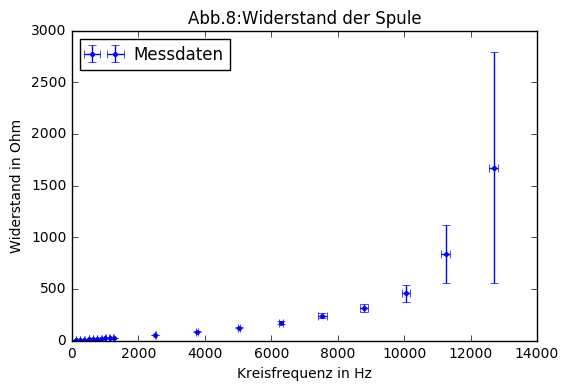

In [9]:
plt.xlabel('Kreisfrequenz in Hz')
plt.ylabel('Widerstand in Ohm')
plt.title('Abb.8:Widerstand der Spule')
plt.errorbar(w, Ueff/I, xerr = dw, yerr = Ueff/I*np.sqrt((dUeff/Ueff)**2+(dI/I)**2), fmt = '.', label='Messdaten')
plt.savefig('figures/Widerstand.pdf', format = 'pdf', bbox_inches = 'tight')
plt.legend(loc = 'best')

Teil 3
-----

In [10]:
#Aufgabe 3: Bestimmung des Erdmagnetfelds

#Gesamtmagnetfeld
U = 0.12/2 #in mVpp gemessen
dU= 0.01/2
A = 41.7/(100)**2
N = 4000
w = 14.1*2*np.pi#Drehfrequenz zu Messung des Gesamtmagnetfeldes
dw= 0.2*2*np.pi
B = U/(A*N*w)
dB=B*np.sqrt((dU/U)**2+(dw/w)**2)

print('B:', B)
print('dB', dB)

#horizontales Magnetfeld aus Restinduktion durch Kompensation
U = 0.028/2 #Messwert in mVpp 
dU= 0.005/2
A = 41.7/(100)**2
N = 4000
w = 14.1*2*np.pi
dw= 0.2*2*np.pi
Bh = U/(A*N*w)
dBh=Bh*np.sqrt((dU/U)**2+(dw/w)**2)

print('Bh:', Bh)
print('dBh', dBh)

#vertikales Magnetfeld aus Kompensationsmagnetfeld
I  = 0.045 #Kompensationsstrom
dI = 0.005
n1 = 124
n2 = 4000
mu0= 1.2566*10**(-6)
r  = 0.1475

Bv  = mu0*8*I*n1/(np.sqrt(125)*r)
dBv = Bv*dI/I
print('Bv:', Bv)
print('dBv:', dBv)

print('Inklination:', np.arctan(Bv/Bh)*180/np.pi, '+-', 1/(Bh*(1+Bv**2/Bh**2))*np.sqrt(dBv**2+Bv**2/Bh**2*dBh**2)*180/np.pi)
print('Inklination:', np.arcsin(Bv/B)*180/np.pi, '+-', 1/(B*np.sqrt(1-Bv**2/B**2))*np.sqrt(dBv**2+(Bv/B*dB)**2)*180/np.pi)
print('Inklination:', np.arccos(Bh/B)*180/np.pi, '+-', 1/(B*np.sqrt(1-Bh**2/B**2))*np.sqrt(dBh**2+(Bh/B*dB)**2)*180/np.pi)

B: 4.0602822361318265e-05
dB 3.43223358741e-06
Bh: 9.473991884307596e-06
dBh 1.69711306445e-06
Bv: 3.40152928641e-05
dBv: 3.7794769849e-06
Inklination: 74.4363345631 +- 3.12172765272
Inklination: 56.9040018613 +- 12.2725286664
Inklination: 76.5066011784 +- 2.7232685631
